<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/military_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = "{:.2f}".format

# Ingest Data  

In [12]:
df = pd.read_excel("/content/World military power.xlsx", header=[0,1]) # multi ixdex 
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                          1.34       Afghanistan   
1           Albania                          2.31           Albania   
2           Algeria                          0.47           Algeria   
3            Angola                          0.84            Angola   
4         Argentina                          0.65         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                  260.00                  Afghanistan   
1                   19.00                      Albania   
2                  551.00                      Algeria   
3                  295.00                       Angola   
4                  227.00                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                               0.00              Afghanistan   
1                               0.00                  Albania   
2                             103.00                  Algeria   
3                              72.00                   Angola   
4                              24.00                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                          25.00                       Afghanistan   
1                           0.00                           Albania   
2                          22.00                           Algeria   
3                          18.00                            Angola   
4                           7.00                         Argentina   

                                                                  \
  Transport Aircraft Fleet Strength value Trainer Aircraft Fleet   
0                                   30.00            Afghanistan   
1                                    0.00                Albania   
2                                   59.00                Algeria   
3                                   30.00                 Angola   
4                                    9.00              Argentina   

                                                          \
  Trainer Aircraft Fleet value Helicopter Fleet Strength   
0                         0.00               Afghanistan   
1                         0.00                   Albania   
2                        87.00                   Algeria   
3                        47.00                    Angola   
4                        64.00                 Argentina   

                                                                    \
  Helicopter Fleet Strength value Attack Helicopter Fleet Strength   
0                          187.00                      Afghanistan   
1                           19.00                          Albania   
2                          257.00                          Algeria   
3                          126.00                           Angola   
4                          100.00                        Argentina   

                                         Land Strength                      \
  Attack Helicopter Fleet Strength value Tank Strength Tank Strength value   
0                                   0.00   Afghanistan                0.00   
1                                   0.00       Albania                0.00   
2                                  45.00       Algeria              880.00   
3                                  15.00        Angola              379.00   
4                                   0.00     Argentina              370.00   

                                                                             \
  AFV/APC Strength AFV/APC Strength value Self-Propelled Artillery Strength   
0      Afghanistan                1062.00                    

MSP index (2nd column) is calculated by 50 parameters. As it goes to 0 MP grows. 

# EDA

## Implement basic steps to see how is your data looks like

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [14]:
df.shape

(138, 60)

In [15]:
df.isna().sum()

2020 ranking       Military Strength                           0
                   Military Strength Power Index               0
Airforce Strength  Aircraft Strength                           0
                   Aircraft Strength value                     0
                   Fighter/Interceptor Strength                0
                   Fighter/Interceptor Strength value          0
                   Attack Aircraft Strength                    0
                   Attack Aircraft Strength value              0
                   Transport Aircraft Fleet Strength           0
                   Transport Aircraft Fleet Strength value     0
                   Trainer Aircraft Fleet                      0
                   Trainer Aircraft Fleet value                0
                   Helicopter Fleet Strength                   0
                   Helicopter Fleet Strength value             0
                   Attack Helicopter Fleet Strength            0
                   Attack

In [16]:
df.duplicated().any()

False

## Convert multi index columns to one level

In [17]:
df.columns = ['_'.join(tuple(map(str, t))) for t in df.columns.values] # joining the column headers

In [18]:
df.columns

Index(['2020 ranking_Military Strength',
       '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength

## Detect and drop duplicated columns

In [19]:
df.head(3)

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget,Finances_defense spending budget value,Finances_External Debt,Finances_External Debt value,Logistics_Airport Totals,Logistics_Airport Totals value,Natural resources_Oil Production,Natural resources_Oil Production value,Natural resources_Oil Consumption,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower,Manpower_Available Manpower value,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
0,Afghanistan,1.34,Afghanistan,260.00,Afghanistan,0.00,Afghanistan,25.00,Afghanistan,30.00,Afghanistan,0.00,Afghanistan,187.00,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,1062.00,Afghanistan,0.00,Afghanistan,176.00,Afghanistan,50.00,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,0.00,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43.00,Afghanistan,0.00,Afghanistan,5500.00,Afghanistan,0.00,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.00,Afghanistan,1200.00,Afghanistan,5987.00
1,Albania,2.31,Albania,19.00,Albania,0.00,Albania,0.00,Albania,0.00,Albania,0.00,Albania,19.00,Albania,0.00,Albania,0.00,Albania,467.00,Albania,0.00,Albania,0.00,Albania,0.00,Albania,38.00,Albania,0.00,Albania,0.00,Albania,0.00,Albania,0.00,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4.00,Albania,16000.00,Albania,42500.00,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748.00,Albania,362.00,Albania,41.00,Albania,691.00
2,Algeria,0.47,Algeria,551.00,Algeria,103.00,Algeria,22.00,Algeria,59.00,Algeria,87.00,Algeria,257.00,Algeria,45.00,Algeria,880.00,Algeria,7361.00,Algeria,320.00,Algeria,240.00,Algeria,316.00,Algeria,201.00,Algeria,0.00,Algeria,6.00,Algeria,0.00,Algeria,5.00,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157.00,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.00,Algeria,0.00,Algeria,6734.00


In [20]:
df_country = pd.DataFrame(df.iloc[:,0]) # keeping one of the Country name column within a dataframe.
df_country

,2020 ranking_Military Strength
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
5,Armenia
6,Australia
7,Austria
8,Azerbaijan
9,Bahrain


In [21]:
df.sample()

,2020 ranking_Military Strength,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget,Finances_defense spending budget value,Finances_External Debt,Finances_External Debt value,Logistics_Airport Totals,Logistics_Airport Totals value,Natural resources_Oil Production,Natural resources_Oil Production value,Natural resources_Oil Consumption,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower,Manpower_Available Manpower value,Manpower_Total Population,Manpower_Total Population value,Geography_Total Square Land Area,Geography_Total Square Land Area value,Geography_Total Coastline Coverage,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage,Geography_Total Waterway Coverage value,Geography_Total Border Coverage,Geography_Total Border Coverage value
37,Estonia,2.59,Estonia,7.00,Estonia,0.00,Estonia,0.00,Estonia,2.00,Estonia,5.00,Estonia,4.00,Estonia,0.00,Estonia,0.00,Estonia,181.00,Estonia,18.00,Estonia,66.00,Estonia,0.00,Estonia,6.00,Estonia,0.00,Estonia,0.00,Estonia,0.00,Estonia,0.00,Estonia,"68,50,00,000",Estonia,"19,05,00,00,000",Estonia,18.00,Estonia,0.00,Estonia,27500.00,Estonia,0.00,Estonia,"5,96,014",Estonia,"12,44,288",Estonia,45228.00,Estonia,3794.00,Estonia,335.00,Estonia,657.00


In [22]:
df.drop(columns= (df.loc[:,[(df[col][0:1] == "Afghanistan").all() for col in df.columns]]), axis=1, inplace=True) # removing all the duplicated columns
df.head()

,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,1.34,260.00,0.00,25.00,30.00,0.00,187.00,0.00,0.00,1062.00,0.00,176.00,50.00,0.00,0.00,0.00,0.00,0.00,"12,00,00,00,000","2,84,00,00,000",43.00,0.00,5500.00,0.00,"1,43,25,743","3,49,40,837","6,52,230",0.00,1200.00,5987.00
1,2.31,19.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,467.00,0.00,0.00,0.00,38.00,0.00,0.00,0.00,0.00,"25,00,00,000","9,50,50,00,000",4.00,16000.00,42500.00,"16,83,00,000","15,19,438","30,57,220",28748.00,362.00,41.00,691.00
2,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,"13,00,00,00,000","6,26,00,00,000",157.00,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.00,0.00,6734.00
3,0.84,295.00,72.00,18.00,30.00,47.00,126.00,15.00,379.00,595.00,28.00,357.00,115.00,57.00,0.00,0.00,0.00,0.00,"7,00,00,00,000","42,08,00,00,000",176.00,"16,66,000",82300.00,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.00,1300.00,5369.00
4,0.65,227.00,24.00,7.00,9.00,64.00,100.00,0.00,370.00,739.00,83.00,172.00,26.00,49.00,0.00,2.00,4.00,0.00,"4,20,00,00,000","2,14,90,00,00,000",1138.00,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.00,11000.00,11968.00


In [23]:
df.shape

(138, 30)

In [24]:
df.isnull().sum()

2020 ranking_Military Strength Power Index                    0
Airforce Strength_Aircraft Strength value                     0
Airforce Strength_Fighter/Interceptor Strength value          0
Airforce Strength_Attack Aircraft Strength value              0
Airforce Strength_Transport Aircraft Fleet Strength value     0
Airforce Strength_Trainer Aircraft Fleet value                0
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength value      0
Land Strength_Tank Strength value                             0
Land Strength_AFV/APC Strength value                          0
Land Strength_Self-Propelled Artillery Strength value         0
Land Strength_Towed Artillery Strength value                  0
Land Strength_Rocket Projector Strength value                 0
Navy Strength_Navy Fleet Strengths value                     14
Navy Strength_Aircraft Carrier Fleet Strength value          23
Navy Strength_Submarine Fleet Strength v

## Fix the dtypes

In [25]:
df = df.astype(str)

In [26]:
df = df.apply(lambda x: x.str.replace(',', ''))   # removing commas in the dataframe. 

In [27]:
 df= df.astype(float)

In [28]:
df.sample()

,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
79,0.57,276.00,59.00,21.00,27.00,82.00,86.00,9.00,434.00,1300.00,108.00,1612.00,84.00,187.00,0.00,1.00,0.00,5.00,2650000000.00,6594000000.00,64.00,12000.00,42600.00,139000000.00,30258643.00,55622506.00,676578.00,1930.00,12800.00,6522.00


In [29]:
df = pd.concat([df, df_country["2020 ranking_Military Strength"]], axis=1) #concataneting the Country name column into the df again.
df.head()

,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value,2020 ranking_Military Strength
0,1.34,260.00,0.00,25.00,30.00,0.00,187.00,0.00,0.00,1062.00,0.00,176.00,50.00,0.00,0.00,0.00,0.00,0.00,12000000000.00,2840000000.00,43.00,0.00,5500.00,0.00,14325743.00,34940837.00,652230.00,0.00,1200.00,5987.00,Afghanistan
1,2.31,19.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,467.00,0.00,0.00,0.00,38.00,0.00,0.00,0.00,0.00,250000000.00,9505000000.00,4.00,16000.00,42500.00,168300000.00,1519438.00,3057220.00,28748.00,362.00,41.00,691.00,Albania
2,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,13000000000.00,6260000000.00,157.00,1306000.00,325000.00,12200000000.00,20741263.00,41657488.00,2381741.00,998.00,0.00,6734.00,Algeria
3,0.84,295.00,72.00,18.00,30.00,47.00,126.00,15.00,379.00,595.00,28.00,357.00,115.00,57.00,0.00,0.00,0.00,0.00,7000000000.00,42080000000.00,176.00,1666000.00,82300.00,8273000000.00,6244205.00,30355880.00,1246700.00,1600.00,1300.00,5369.00,Angola
4,0.65,227.00,24.00,7.00,9.00,64.00,100.00,0.00,370.00,739.00,83.00,172.00,26.00,49.00,0.00,2.00,4.00,0.00,4200000000.00,214900000000.00,1138.00,479400.00,685000.00,2185000000.00,20179430.00,44694198.00,2780400.00,4989.00,11000.00,11968.00,Argentina


In [30]:
df= df[ ['2020 ranking_Military Strength'] + [ col for col in df.columns if col != '2020 ranking_Military Strength' ]] # removing the last column to the first index

In [31]:
df.rename(columns = {'2020 ranking_Military Strength':'Country'}, inplace = True) #renaming the column

In [32]:
df.sample()

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
43,Germany,0.22,712.00,128.00,74.00,71.00,26.00,386.00,56.00,245.00,4583.00,108.00,0.00,38.00,80.00,0.00,6.00,0.00,9.00,50000000000.00,5326000000000.00,539.00,43410.00,2500000.00,145400000.00,37010559.00,80457737.00,357022.00,2389.00,7467.00,3694.00


In [33]:
df.shape

(138, 31)

## Check for missing values 

In [34]:
df.isnull().sum().sort_values(ascending=False)

Geography_Total Coastline Coverage value                     29
Navy Strength_Aircraft Carrier Fleet Strength value          23
Navy Strength_Frigate Fleet Strength value                   23
Navy Strength_Destroyer Fleet Strength value                 23
Navy Strength_Submarine Fleet Strength value                 23
Navy Strength_Navy Fleet Strengths value                     14
Geography_Total Border Coverage value                         9
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength value      0
Geography_Total Waterway Coverage value                       0
Airforce Strength_Aircraft Strength value                     0
Geography_Total Square Land Area value                        0
Manpower_Total Population value                               0
Manpower_Available Manpower value                             0
Natural resources_Proven Oil Reserves value                   0
Natural resources_Oil Consumption value 

In [ ]:
df.isnull().melt(value_name="missing")

,variable,missing
0,Country,False
1,Country,False
2,Country,False
3,Country,False
4,Country,False
...,...,...
4273,Geography_Total Border Coverage value,False
4274,Geography_Total Border Coverage value,False
4275,Geography_Total Border Coverage value,False
4276,Geography_Total Border Coverage value,False


<Figure size 864x576 with 0 Axes>

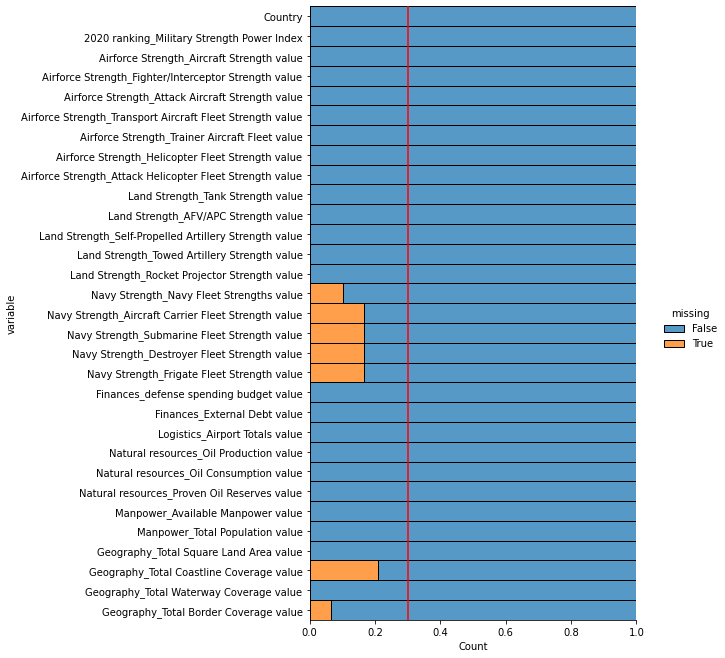

In [35]:
plt.figure(figsize=(12,8))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [ ]:
df.loc[df["Geography_Total Coastline Coverage value"].isnull(), ['Country',
                                                                             'Navy Strength_Navy Fleet Strengths value',
                                                                             'Navy Strength_Aircraft Carrier Fleet Strength value',
                                                                             'Navy Strength_Submarine Fleet Strength value',
                                                                             'Navy Strength_Destroyer Fleet Strength value',
                                                                             'Navy Strength_Frigate Fleet Strength value',
                                                                             'Geography_Total Waterway Coverage value']]

,Country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Geography_Total Waterway Coverage value
5,Armenia,0.0,NaN,NaN,NaN,NaN,0.0
7,Austria,0.0,NaN,NaN,NaN,NaN,0.0
11,Belarus,0.0,NaN,NaN,NaN,NaN,2500.0
13,Bhutan,0.0,NaN,NaN,NaN,NaN,0.0
14,Bolivia,173.0,0.0,0.0,0.0,0.0,10000.0
16,Botswana,NaN,NaN,NaN,NaN,NaN,0.0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,0.0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,2800.0
24,Chad,NaN,NaN,NaN,NaN,NaN,0.0
30,Czechia,NaN,NaN,NaN,NaN,NaN,664.0


In [37]:
df.loc[
    
    df["Geography_Total Coastline Coverage value"].isnull(),
    
    ['Navy Strength_Navy Fleet Strengths value',
     'Navy Strength_Aircraft Carrier Fleet Strength value',
     'Navy Strength_Submarine Fleet Strength value',
     'Navy Strength_Destroyer Fleet Strength value',
     'Navy Strength_Frigate Fleet Strength value']
    
    ] = 0

After checking the null values for coastline feature I see that all of the countries are landlocked countries. Therefore I fill them with 0.

<Figure size 288x432 with 0 Axes>

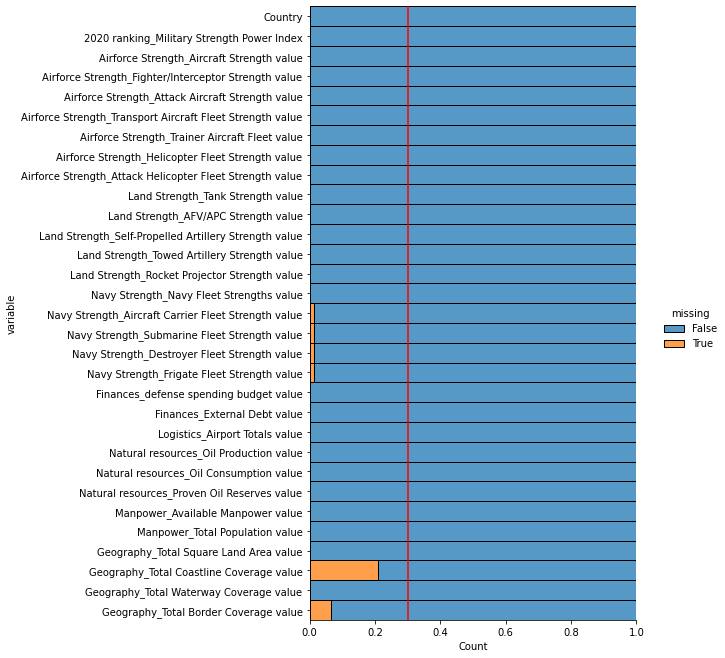

In [38]:
plt.figure(figsize=(4,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

In [39]:
df.loc[df['Navy Strength_Aircraft Carrier Fleet Strength value'].isnull()|
             df['Navy Strength_Submarine Fleet Strength value'].isnull()|
             df['Navy Strength_Destroyer Fleet Strength value'].isnull()|
             df['Navy Strength_Frigate Fleet Strength value'].isnull()] 

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
110,South Korea,0.15,1649.00,414.00,71.00,41.00,298.00,803.00,112.00,2614.00,14000.00,3040.00,3854.00,575.00,234.00,NaN,NaN,NaN,NaN,44000000000.00,384600000000.00,111.00,0.00,2800000.00,0.00,25709049.00,51418097.00,99720.00,2413.00,1600.00,237.00
132,Uzbekistan,0.81,185.00,66.00,20.00,18.00,2.00,79.00,25.00,420.00,1215.00,137.00,0.00,98.00,0.00,NaN,NaN,NaN,NaN,975000000.00,16900000000.00,53.00,46070.00,142000.00,594000000.00,15912566.00,30023709.00,447400.00,420.00,1100.00,6893.00


In [40]:
df.loc[df["Country"] == "Uzbekistan",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]]

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
132,0.00,NaN,NaN,NaN,NaN


In [41]:
df.loc[df["Country"] == "Uzbekistan",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]]=0

In [42]:
df.loc[df["Country"] == "South Korea",
            ['Navy Strength_Navy Fleet Strengths value',
             'Navy Strength_Aircraft Carrier Fleet Strength value',
             'Navy Strength_Submarine Fleet Strength value',
             'Navy Strength_Destroyer Fleet Strength value',
             'Navy Strength_Frigate Fleet Strength value',
           ]]

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
110,234.00,NaN,NaN,NaN,NaN


In [43]:
# All the numbers gathered from wikipeida
df.loc[df["Country"] == "South Korea",'Navy Strength_Aircraft Carrier Fleet Strength value'] = 0
df.loc[df["Country"] == "South Korea",'Navy Strength_Submarine Fleet Strength value'] = 18
df.loc[df["Country"] == "South Korea",'Navy Strength_Destroyer Fleet Strength value'] = 12
df.loc[df["Country"] == "South Korea",'Navy Strength_Frigate Fleet Strength value'] = 12

In [44]:
df.loc[df["Country"] == "South Korea"]

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
110,South Korea,0.15,1649.00,414.00,71.00,41.00,298.00,803.00,112.00,2614.00,14000.00,3040.00,3854.00,575.00,234.00,0.00,18.00,12.00,12.00,44000000000.00,384600000000.00,111.00,0.00,2800000.00,0.00,25709049.00,51418097.00,99720.00,2413.00,1600.00,237.00


<Figure size 288x432 with 0 Axes>

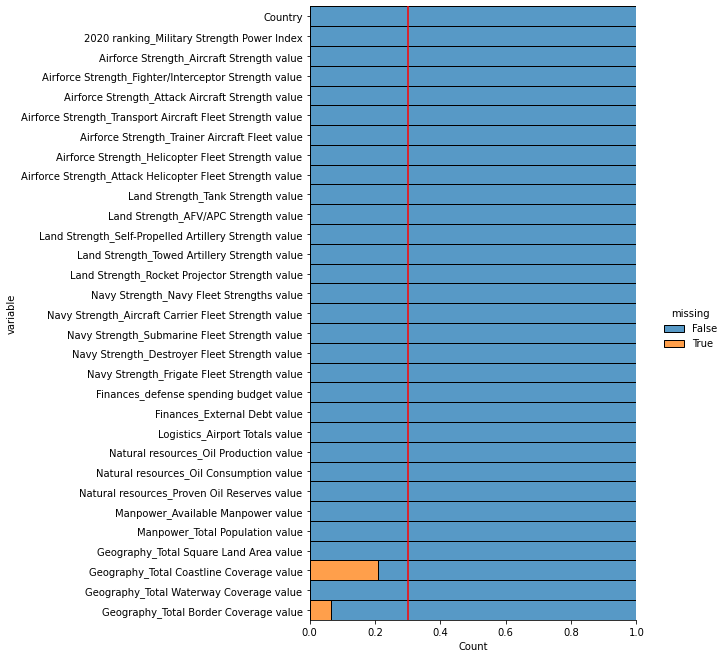

In [45]:
plt.figure(figsize=(4,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="r");

In [46]:
df.loc[df['Geography_Total Coastline Coverage value'].isnull()]

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.13,64.00,0.00,9.00,3.00,13.00,37.00,20.00,110.00,748.00,38.00,150.00,68.00,0.00,0.00,0.00,0.00,0.00,1385000000.00,10410000000.00,11.00,0.00,47500.00,0.00,1696085.00,3038217.00,29743.00,NaN,0.00,1570.00
7,Austria,0.96,120.00,15.00,0.00,11.00,32.00,62.00,0.00,56.00,467.00,33.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3380000000.00,630800000000.00,52.00,14260.00,215000.00,43000000.00,4017691.00,8793370.00,83871.00,NaN,0.00,2524.00
11,Belarus,0.82,202.00,39.00,68.00,4.00,28.00,63.00,21.00,532.00,1560.00,482.00,228.00,238.00,0.00,0.00,0.00,0.00,0.00,623702800.00,39920000000.00,65.00,32000.00,190000.00,198000000.00,4982905.00,9527543.00,207600.00,NaN,2500.00,3599.00
13,Bhutan,10.17,2.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25120000.00,2671000000.00,2.00,0.00,2000.00,0.00,176808.00,766397.00,38394.00,NaN,0.00,1136.00
14,Bolivia,0.99,69.00,0.00,0.00,14.00,23.00,38.00,0.00,54.00,137.00,0.00,86.00,0.00,0.00,0.00,0.00,0.00,0.00,660000000.00,12810000000.00,855.00,59330.00,60000.00,211500000.00,5075416.00,11306341.00,1098581.00,NaN,10000.00,7252.00
16,Botswana,2.06,45.00,10.00,0.00,11.00,8.00,16.00,0.00,55.00,245.00,0.00,30.00,20.00,0.00,0.00,0.00,0.00,0.00,450000000.00,2187000000.00,74.00,0.00,16500.00,0.00,962617.00,2249104.00,581730.00,NaN,0.00,4347.00
19,Burkina Faso,1.90,16.00,0.00,3.00,1.00,4.00,8.00,2.00,0.00,350.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,130000000.00,3056000000.00,23.00,0.00,10500.00,0.00,7800000.00,19742715.00,274200.00,NaN,0.00,3611.00
23,Central African Republic,3.29,3.00,0.00,0.00,2.00,0.00,1.00,0.00,4.00,55.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,20000000.00,779900000.00,39.00,0.00,4500.00,0.00,2348581.00,5745062.00,622984.00,NaN,2800.00,5920.00
24,Chad,1.64,35.00,0.00,6.00,6.00,4.00,17.00,3.00,60.00,372.00,10.00,51.00,10.00,0.00,0.00,0.00,0.00,0.00,200000000.00,1724000000.00,59.00,128000.00,100000.00,1500000000.00,6030834.00,15833116.00,1284000.00,NaN,0.00,6406.00
30,Czechia,0.55,95.00,12.00,16.00,8.00,15.00,44.00,15.00,116.00,682.00,86.00,85.00,0.00,0.00,0.00,0.00,0.00,0.00,2969000000.00,205200000000.00,128.00,2000.00,200000.00,15000000.00,5011174.00,10686269.00,78867.00,NaN,664.00,2046.00


After checking the null values for coastline feature I see that all of the countries are landlocked countries. Therefore I fill these values by 0.
Source: https://en.wikipedia.org/wiki/Landlocked_country#:~:text=A%20landlocked%20country%20is%20a,the%20world's%20largest%20landlocked%20country.  

In [47]:
df.loc[df['Geography_Total Coastline Coverage value'].isnull(), 'Geography_Total Coastline Coverage value'] = 0

In [48]:
df.loc[df['Geography_Total Border Coverage value'].isnull()]

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
6,Australia,0.32,464.00,82.00,6.00,38.00,174.00,133.00,22.00,59.00,3051.00,0.00,54.00,0.00,48.00,2.00,6.00,2.00,8.00,26300000000.00,1714000000000.00,480.00,263000.00,1005000.00,1821000000.00,10808002.00,23470145.00,7741220.00,25760.00,2000.00,NaN
9,Bahrain,1.85,109.00,17.00,0.00,2.00,37.00,65.00,22.00,180.00,843.00,33.00,26.00,17.00,39.00,0.00,0.00,0.00,1.00,1415000000.00,52150000000.00,4.00,45000.00,55000.00,124600000.00,806505.00,1422659.00,760.00,161.00,0.00,NaN
57,Japan,0.15,1561.00,279.00,12.00,60.00,427.00,637.00,119.00,1004.00,3130.00,238.00,500.00,99.00,155.00,4.00,20.00,40.00,0.00,49000000000.00,3240000000000.00,175.00,3841.00,4000000.00,44120000.00,53873803.00,126168156.00,377915.00,29751.00,1770.00,NaN
69,Madagascar,3.09,6.00,0.00,0.00,0.00,0.00,6.00,0.00,12.00,103.00,0.00,25.00,0.00,8.00,0.00,0.00,0.00,0.00,115000000.00,4089000000.00,83.00,0.00,18500.00,0.00,10145026.00,25683610.00,587040.00,4828.00,600.00,NaN
83,New Zealand,1.37,48.00,0.00,0.00,7.00,13.00,22.00,0.00,0.00,200.00,0.00,24.00,0.00,11.00,0.00,0.00,0.00,2.00,4300000000.00,91620000000.00,123.00,31480.00,150000.00,56900000.00,2115989.00,4545627.00,267710.00,15134.00,0.00,NaN
95,Philippines,0.79,171.00,0.00,19.00,23.00,24.00,97.00,0.00,7.00,513.00,0.00,286.00,0.00,103.00,0.00,0.00,0.00,2.00,3470000000.00,76180000000.00,247.00,15000.00,320000.00,138500000.00,51887757.00,105893381.00,300000.00,36289.00,3219.00,NaN
105,Singapore,0.80,235.00,100.00,0.00,9.00,36.00,77.00,17.00,180.00,3000.00,48.00,77.00,24.00,40.00,0.00,0.00,0.00,6.00,11200000000.00,566100000000.00,9.00,0.00,1340000.00,0.00,4017314.00,5995991.00,697.00,193.00,10.00,NaN
113,Sri Lanka,1.47,77.00,0.00,0.00,15.00,6.00,54.00,9.00,202.00,570.00,0.00,209.00,22.00,40.00,0.00,0.00,0.00,0.00,2500000000.00,51720000000.00,19.00,0.00,90000.00,0.00,10927071.00,22576592.00,65610.00,1340.00,160.00,NaN
119,Taiwan,0.40,744.00,289.00,0.00,19.00,207.00,210.00,91.00,1180.00,2000.00,482.00,1160.00,115.00,117.00,0.00,4.00,4.00,22.00,10725000000.00,181900000000.00,37.00,196.00,1032000.00,2380000.00,12196809.00,23545963.00,35980.00,1566.00,3720.00,NaN


These countries are island counties. Therefore they only border to the sea. I fill the null values by 0.

In [49]:
df.loc[df['Geography_Total Border Coverage value'].isnull(), 'Geography_Total Border Coverage value'] =0

In [50]:
df.isnull().any().sum()

0

In [51]:
df.reset_index(drop=True,inplace=True)

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [52]:
df.drop(['Geography_Total Square Land Area value',
               'Geography_Total Coastline Coverage value',
               'Geography_Total Waterway Coverage value',
               'Geography_Total Border Coverage value'],axis=1,inplace=True)

In [53]:
df.shape

(138, 27)

## Visualy inspect the some features

In [54]:
import plotly.express as px

In [55]:
fig = px.bar(df,x= "Country" , y = df["Airforce Strength_Aircraft Strength value"])
fig.show()

In [56]:
fig = px.box(df, x = df["Airforce Strength_Aircraft Strength value"],
             hover_name=df["Country"])
fig.show()

In [57]:
fig = px.bar(df,x= "Country" , y = df["Navy Strength_Navy Fleet Strengths value"])
fig.show()

In [58]:
fig = px.box(df, x = df["Navy Strength_Navy Fleet Strengths value"],
             hover_name=df["Country"])
fig.show()

In [59]:
fig = px.bar(df,x= "Country" , y = df["Manpower_Available Manpower value"])
fig.show()

In [60]:
fig = px.box(df, x = df["Manpower_Available Manpower value"],
             hover_name=df["Country"])
fig.show()

In [61]:
fig = px.bar(df,x= "Country" , y = df["Finances_defense spending budget value"])
fig.show()

In [62]:
fig = px.box(df, x = df["Finances_defense spending budget value"],
             hover_name=df["Country"])
fig.show()

In [63]:
fig = px.bar(df,x= "Country" , y = df["Land Strength_Tank Strength value"])
fig.show()

In [64]:
fig = px.box(df, x = df["Land Strength_Tank Strength value"],
             hover_name=df["Country"])
fig.show()

In [65]:
df.sample()

,Country,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
24,Chad,1.64,35.00,0.00,6.00,6.00,4.00,17.00,3.00,60.00,372.00,10.00,51.00,10.00,0.00,0.00,0.00,0.00,0.00,200000000.00,1724000000.00,59.00,128000.00,100000.00,1500000000.00,6030834.00,15833116.00


## Decriptive statistics

In [66]:
pd.options.display.float_format = "{:,.1f}".format # for easily read long numbers.

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020 ranking_Military Strength Power Index,138.0,1.5,1.3,0.1,0.6,1.0,2.0,10.2
Airforce Strength_Aircraft Strength value,138.0,388.5,"1,232.0",0.0,33.0,111.0,290.2,"13,264.0"
Airforce Strength_Fighter/Interceptor Strength value,138.0,81.6,230.3,0.0,0.0,17.0,60.5,"2,085.0"
Airforce Strength_Attack Aircraft Strength value,138.0,25.8,94.5,0.0,0.0,0.0,15.8,742.0
Airforce Strength_Transport Aircraft Fleet Strength value,138.0,30.2,92.3,0.0,3.0,9.0,26.0,945.0
Airforce Strength_Trainer Aircraft Fleet value,138.0,82.8,240.8,0.0,4.2,26.0,79.2,"2,643.0"
Airforce Strength_Helicopter Fleet Strength value,138.0,154.1,520.2,0.0,15.2,44.0,126.8,"5,768.0"
Airforce Strength_Attack Helicopter Fleet Strength value,138.0,25.6,97.3,0.0,0.0,2.0,17.8,967.0
Land Strength_Tank Strength value,138.0,646.6,"1,515.5",0.0,19.2,153.0,436.2,"12,950.0"
Land Strength_AFV/APC Strength value,138.0,"2,485.7","5,410.5",0.0,250.2,734.5,"2,000.0","39,253.0"


In [68]:
df.corr()

,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
2020 ranking_Military Strength Power Index,1.0,-0.3,-0.3,-0.2,-0.3,-0.3,-0.2,-0.2,-0.3,-0.4,-0.3,-0.3,-0.2,-0.4,-0.2,-0.3,-0.2,-0.4,-0.2,-0.2,-0.2,-0.3,-0.3,-0.2,-0.2,-0.2
Airforce Strength_Aircraft Strength value,-0.3,1.0,0.9,0.9,1.0,1.0,1.0,1.0,0.6,0.8,0.5,0.6,0.5,0.5,0.9,0.7,0.9,0.3,1.0,0.8,0.9,0.6,0.9,0.1,0.4,0.4
Airforce Strength_Fighter/Interceptor Strength value,-0.3,0.9,1.0,0.9,0.9,0.9,0.9,0.9,0.7,0.9,0.7,0.7,0.7,0.7,0.8,0.8,0.9,0.5,0.9,0.7,0.7,0.6,0.9,0.1,0.6,0.6
Airforce Strength_Attack Aircraft Strength value,-0.2,0.9,0.9,1.0,0.9,0.8,0.8,0.9,0.8,0.9,0.8,0.7,0.8,0.6,0.7,0.8,0.7,0.3,0.7,0.5,0.7,0.7,0.8,0.2,0.5,0.5
Airforce Strength_Transport Aircraft Fleet Strength value,-0.3,1.0,0.9,0.9,1.0,0.9,1.0,0.9,0.6,0.8,0.5,0.6,0.5,0.5,0.9,0.7,0.9,0.3,0.9,0.8,0.9,0.7,0.9,0.2,0.4,0.4
Airforce Strength_Trainer Aircraft Fleet value,-0.3,1.0,0.9,0.8,0.9,1.0,1.0,0.9,0.5,0.8,0.4,0.5,0.4,0.5,0.9,0.6,0.9,0.2,0.9,0.8,0.9,0.6,0.9,0.1,0.3,0.3
Airforce Strength_Helicopter Fleet Strength value,-0.2,1.0,0.9,0.8,1.0,1.0,1.0,1.0,0.6,0.8,0.5,0.5,0.4,0.5,0.9,0.6,0.9,0.2,1.0,0.8,0.9,0.6,0.9,0.1,0.3,0.3
Airforce Strength_Attack Helicopter Fleet Strength value,-0.2,1.0,0.9,0.9,0.9,0.9,1.0,1.0,0.7,0.9,0.6,0.6,0.6,0.5,0.9,0.7,0.9,0.3,0.9,0.7,0.8,0.7,0.8,0.1,0.3,0.3
Land Strength_Tank Strength value,-0.3,0.6,0.7,0.8,0.6,0.5,0.6,0.7,1.0,0.8,0.8,0.8,0.9,0.7,0.4,0.8,0.5,0.4,0.4,0.3,0.3,0.6,0.5,0.1,0.4,0.4
Land Strength_AFV/APC Strength value,-0.4,0.8,0.9,0.9,0.8,0.8,0.8,0.9,0.8,1.0,0.8,0.8,0.8,0.7,0.7,0.8,0.8,0.5,0.8,0.6,0.6,0.7,0.8,0.2,0.6,0.5


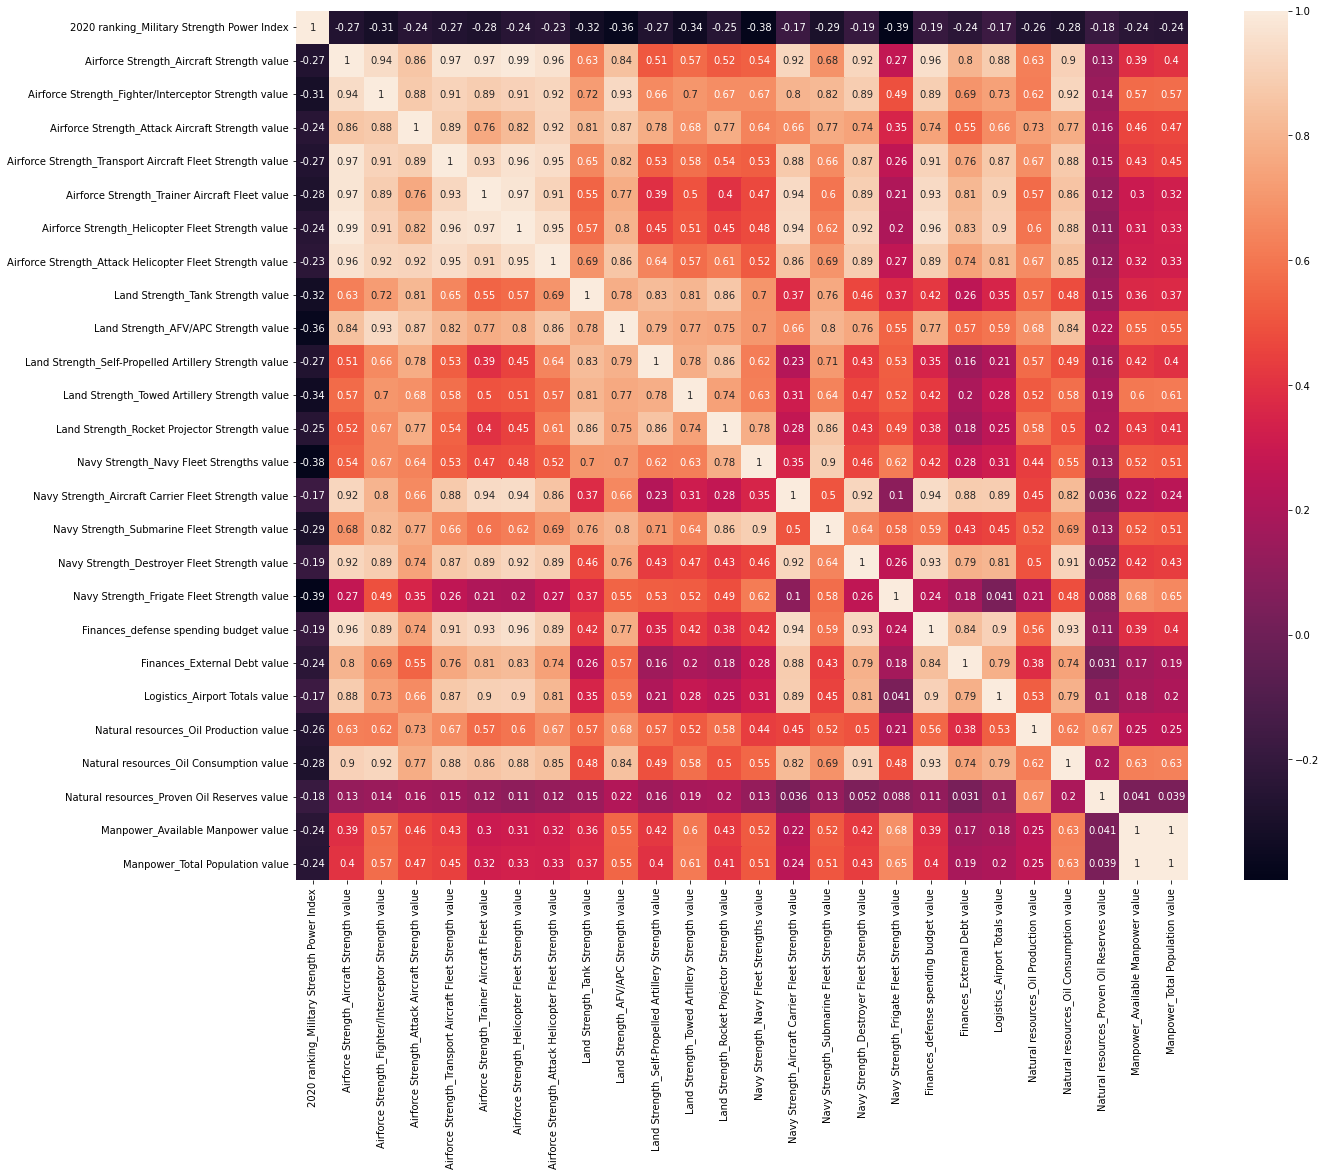

In [69]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True)

There are lots of features and some of them are very strongly correlated. Therefore I decided to implement PCA method.

# Data Preprocessing

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
X = df.drop(["Country"], axis=1)

In [72]:
scaler = StandardScaler()

In [73]:
X_scaled = scaler.fit_transform(X)

In [74]:
pd.options.display.float_format = "{:.4f}".format

# Modelling

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=4, random_state=42) 

In [77]:
principal_components = pca.fit_transform(X_scaled)
principal_components

array([[-1.08392355e+00,  4.26910611e-01, -1.09001316e-01,
        -1.28745287e-01],
       [-1.53153233e+00,  4.75364896e-01, -7.35088613e-03,
        -3.50079667e-01],
       [ 6.70641310e-01, -7.27009708e-01,  3.70625736e-01,
         1.27432707e-01],
       [-5.79263121e-01,  1.66865040e-01,  4.46333187e-01,
         3.44059374e-01],
       [-5.48315158e-01,  4.85443739e-01, -1.25007757e-01,
         1.60061304e-01],
       [-1.36121887e+00,  4.45862335e-01,  9.14324951e-02,
        -3.79181954e-01],
       [ 3.25223878e-01,  7.39172931e-01, -7.06859857e-01,
         3.09813300e-01],
       [-1.25478302e+00,  5.64516275e-01, -9.09130135e-02,
        -1.72919847e-02],
       [-7.92713294e-01, -4.27855896e-02,  3.72946575e-01,
         3.86404950e-03],
       [-1.26194059e+00,  4.10459693e-01,  1.89639720e-02,
        -2.98145344e-01],
       [-4.94096394e-01, -7.99230606e-01, -1.19307349e+00,
         3.01011497e-01],
       [-7.16677618e-01, -4.88908979e-02,  4.07020172e-01,
      

In [78]:
component_df = pd.DataFrame(data = principal_components, columns = ["first_component", 
                                                                    "second_component",
                                                                    "third_component",
                                                                    "forth_component"
                                                                    ])
component_df

,first_component,second_component,third_component,forth_component
0,-1.0839,0.4269,-0.1090,-0.1287
1,-1.5315,0.4754,-0.0074,-0.3501
2,0.6706,-0.7270,0.3706,0.1274
3,-0.5793,0.1669,0.4463,0.3441
4,-0.5483,0.4854,-0.1250,0.1601
5,-1.3612,0.4459,0.0914,-0.3792
6,0.3252,0.7392,-0.7069,0.3098
7,-1.2548,0.5645,-0.0909,-0.0173
8,-0.7927,-0.0428,0.3729,0.0039
9,-1.2619,0.4105,0.0190,-0.2981


In [79]:
eigenvectors_first_component = pca.components_[0]
eigenvectors_first_component

array([-0.08643584,  0.24088408,  0.24642596,  0.23040028,  0.23785833,
        0.22614127,  0.23260515,  0.23719104,  0.18571395,  0.23470298,
        0.16978637,  0.17759256,  0.17473207,  0.17318285,  0.20542776,
        0.2050397 ,  0.22264837,  0.11551585,  0.2244592 ,  0.17901629,
        0.19506038,  0.17399853,  0.2330797 ,  0.0480855 ,  0.13614214,
        0.13806981])

In [80]:
first_eigenvectors = pd.DataFrame(eigenvectors_first_component, index=X.columns, 
                                  columns=["first_eigenvectors"]).sort_values("first_eigenvectors", ascending=False)

In [81]:
first_eigenvectors

,first_eigenvectors
Airforce Strength_Fighter/Interceptor Strength value,0.2464
Airforce Strength_Aircraft Strength value,0.2409
Airforce Strength_Transport Aircraft Fleet Strength value,0.2379
Airforce Strength_Attack Helicopter Fleet Strength value,0.2372
Land Strength_AFV/APC Strength value,0.2347
Natural resources_Oil Consumption value,0.2331
Airforce Strength_Helicopter Fleet Strength value,0.2326
Airforce Strength_Attack Aircraft Strength value,0.2304
Airforce Strength_Trainer Aircraft Fleet value,0.2261
Finances_defense spending budget value,0.2245


In [82]:
eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([ 0.11753505,  0.1357274 , -0.00586906, -0.05306811,  0.11082183,
        0.18770134,  0.18135903,  0.0982599 , -0.21413408, -0.1004985 ,
       -0.27957999, -0.25805806, -0.2833225 , -0.24443397,  0.2735646 ,
       -0.17996144,  0.15795807, -0.30339088,  0.20109789,  0.27030905,
        0.27447334, -0.0393643 ,  0.05851055, -0.0663082 , -0.24322367,
       -0.22919563])

In [83]:
second_eigenvectors = pd.DataFrame(eigenvectors_second_component, index=X.columns, 
                                   columns=["second_eigenvectors"]).sort_values("second_eigenvectors", ascending=False)

second_eigenvectors

,second_eigenvectors
Logistics_Airport Totals value,0.2745
Navy Strength_Aircraft Carrier Fleet Strength value,0.2736
Finances_External Debt value,0.2703
Finances_defense spending budget value,0.2011
Airforce Strength_Trainer Aircraft Fleet value,0.1877
Airforce Strength_Helicopter Fleet Strength value,0.1814
Navy Strength_Destroyer Fleet Strength value,0.1580
Airforce Strength_Aircraft Strength value,0.1357
2020 ranking_Military Strength Power Index,0.1175
Airforce Strength_Transport Aircraft Fleet Strength value,0.1108


In [84]:
eigenvectors_third_component = pca.components_[2]
eigenvectors_third_component

array([ 0.02368226,  0.00758693, -0.05094347,  0.14390489,  0.02170832,
        0.00162801,  0.01708302,  0.11047495,  0.25181475,  0.03915361,
        0.20977597,  0.03461879,  0.22038415, -0.00759896, -0.06171519,
        0.02762757, -0.11307712, -0.29908694, -0.09334875, -0.1000115 ,
        0.00658428,  0.34902396, -0.17418129,  0.34743764, -0.45072071,
       -0.45026908])

In [85]:
third_eigenvectors = pd.DataFrame(eigenvectors_third_component, index=X.columns, 
                                   columns=["third_eigenvectors"]).sort_values("third_eigenvectors", ascending=False)

third_eigenvectors

,third_eigenvectors
Natural resources_Oil Production value,0.3490
Natural resources_Proven Oil Reserves value,0.3474
Land Strength_Tank Strength value,0.2518
Land Strength_Rocket Projector Strength value,0.2204
Land Strength_Self-Propelled Artillery Strength value,0.2098
Airforce Strength_Attack Aircraft Strength value,0.1439
Airforce Strength_Attack Helicopter Fleet Strength value,0.1105
Land Strength_AFV/APC Strength value,0.0392
Land Strength_Towed Artillery Strength value,0.0346
Navy Strength_Submarine Fleet Strength value,0.0276


In [86]:
eigenvectors_forth_component = pca.components_[3]
eigenvectors_forth_component

array([-2.89137293e-01, -3.28793738e-02, -3.33082637e-02, -1.05744937e-01,
       -1.58912653e-03, -2.71331928e-04, -3.84653811e-02, -1.04667816e-01,
       -2.23050952e-01,  2.10458984e-04, -1.68899329e-01, -2.86177276e-02,
       -1.83753211e-01, -9.43207971e-02, -3.32695891e-02, -1.47019633e-01,
       -3.88738803e-02,  1.24041304e-01,  4.46374758e-02,  3.17105969e-02,
        4.16240139e-02,  3.83456989e-01,  1.52111580e-01,  7.08175748e-01,
        1.61721001e-01,  1.63207741e-01])

In [87]:
forth_eigenvectors = pd.DataFrame(eigenvectors_forth_component, index=X.columns, 
                                   columns=["forth_eigenvectors"]).sort_values("forth_eigenvectors", ascending=False)

forth_eigenvectors

,forth_eigenvectors
Natural resources_Proven Oil Reserves value,0.7082
Natural resources_Oil Production value,0.3835
Manpower_Total Population value,0.1632
Manpower_Available Manpower value,0.1617
Natural resources_Oil Consumption value,0.1521
Navy Strength_Frigate Fleet Strength value,0.1240
Finances_defense spending budget value,0.0446
Logistics_Airport Totals value,0.0416
Finances_External Debt value,0.0317
Land Strength_AFV/APC Strength value,0.0002


In [88]:
pd.concat([first_eigenvectors, second_eigenvectors, third_eigenvectors, forth_eigenvectors ], axis=1)

,first_eigenvectors,second_eigenvectors,third_eigenvectors,forth_eigenvectors
Airforce Strength_Fighter/Interceptor Strength value,0.2464,-0.0059,-0.0509,-0.0333
Airforce Strength_Aircraft Strength value,0.2409,0.1357,0.0076,-0.0329
Airforce Strength_Transport Aircraft Fleet Strength value,0.2379,0.1108,0.0217,-0.0016
Airforce Strength_Attack Helicopter Fleet Strength value,0.2372,0.0983,0.1105,-0.1047
Land Strength_AFV/APC Strength value,0.2347,-0.1005,0.0392,0.0002
Natural resources_Oil Consumption value,0.2331,0.0585,-0.1742,0.1521
Airforce Strength_Helicopter Fleet Strength value,0.2326,0.1814,0.0171,-0.0385
Airforce Strength_Attack Aircraft Strength value,0.2304,-0.0531,0.1439,-0.1057
Airforce Strength_Trainer Aircraft Fleet value,0.2261,0.1877,0.0016,-0.0003
Finances_defense spending budget value,0.2245,0.2011,-0.0933,0.0446


In [89]:
df_X_scaled = pd.DataFrame(X_scaled)

In [90]:
df_X_scaled.loc[0]

0    -0.0882
1    -0.1047
2    -0.3554
3    -0.0081
4    -0.0025
5    -0.3452
6     0.0635
7    -0.2642
8    -0.4282
9    -0.2641
10   -0.3095
11   -0.2715
12   -0.2216
13   -0.5292
14   -0.1698
15   -0.3164
16   -0.1875
17   -0.4861
18   -0.0297
19   -0.2807
20   -0.2044
21   -0.3525
22   -0.3223
23   -0.2804
24   -0.1320
25   -0.1109
Name: 0, dtype: float64

In [96]:
(df_X_scaled.loc[0] * eigenvectors_first_component).sum()

-1.0839235475926743

In [97]:
(df_X_scaled.loc[0] * eigenvectors_second_component).sum()

0.426910610951716

In [98]:
(df_X_scaled.loc[0] * eigenvectors_third_component).sum()

-0.10900131588841051

In [99]:
(df_X_scaled.loc[0] * eigenvectors_forth_component).sum()

-0.12874528720376616

In [100]:
component_df.head()

,first_component,second_component,third_component,forth_component
0,-1.0839,0.4269,-0.1090,-0.1287
1,-1.5315,0.4754,-0.0074,-0.3501
2,0.6706,-0.7270,0.3706,0.1274
3,-0.5793,0.1669,0.4463,0.3441
4,-0.5483,0.4854,-0.1250,0.1601


In [101]:
pca.explained_variance_ 

array([15.98900774,  3.78081354,  1.81831222,  1.28609306])

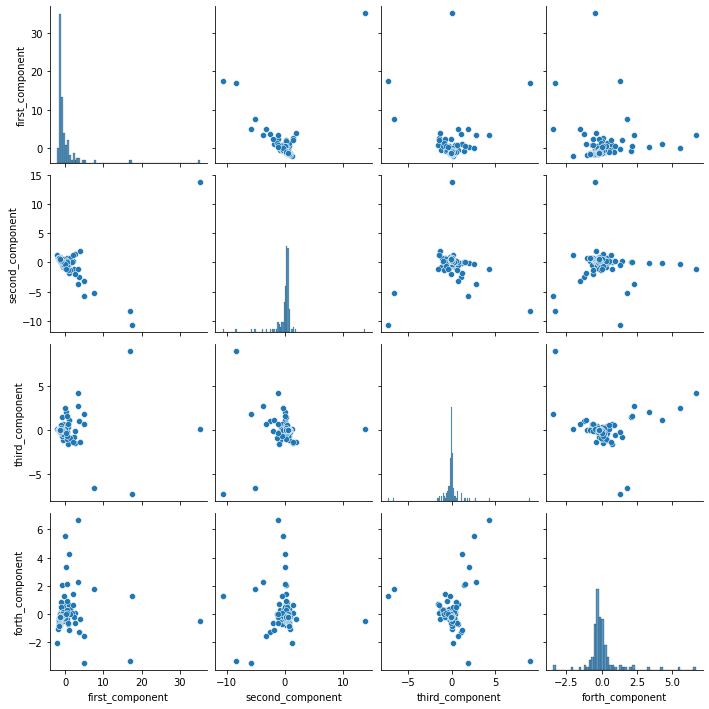

In [102]:
sns.pairplot(component_df)

In [103]:
component_df.corr().round()

,first_component,second_component,third_component,forth_component
first_component,1.0000,0.0000,0.0000,0.0000
second_component,0.0000,1.0000,-0.0000,-0.0000
third_component,0.0000,-0.0000,1.0000,-0.0000
forth_component,0.0000,-0.0000,-0.0000,1.0000


In [104]:
pca.explained_variance_ratio_

array([0.61050559, 0.14436217, 0.06942831, 0.04910667])

In [105]:
pca.explained_variance_ratio_.cumsum()

array([0.61050559, 0.75486776, 0.82429607, 0.87340274])

Text(0, 0.5, 'Variance Ratio')

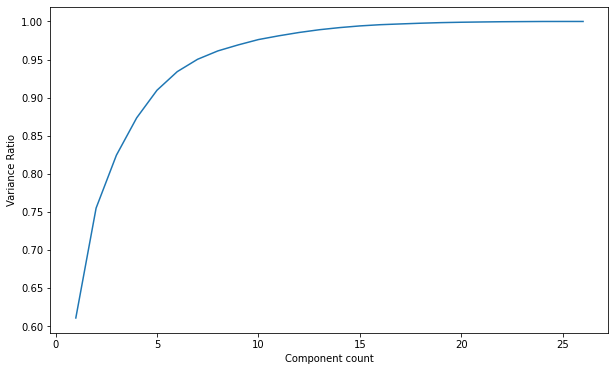

In [106]:
pca = PCA().fit(X_scaled)
x = range(1,27)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_),)
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

In [109]:
pca = PCA(n_components=26).fit(X_scaled)

In [110]:
my_dict = {"explained_variance":pca.explained_variance_, 
        "explained_variance_ratio":pca.explained_variance_ratio_,
        "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [111]:
df_ev = pd.DataFrame(my_dict, index = range(1,27))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,15.9890,0.6105,0.6105
2,3.7808,0.1444,0.7549
3,1.8183,0.0694,0.8243
4,1.2861,0.0491,0.8734
5,0.9490,0.0362,0.9096
6,0.6409,0.0245,0.9341
7,0.4242,0.0162,0.9503
8,0.2883,0.0110,0.9613
9,0.2061,0.0079,0.9692
10,0.1844,0.0070,0.9762


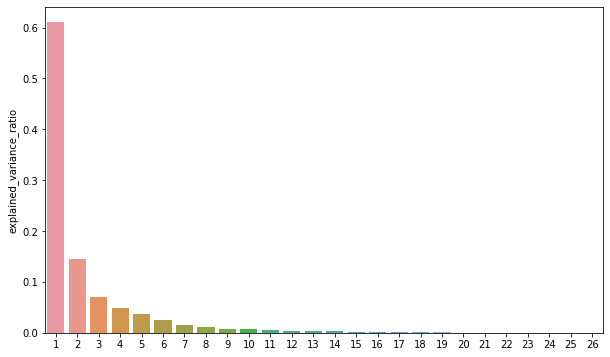

In [112]:
sns.barplot(x = df_ev.index, y= df_ev.explained_variance_ratio)

In [120]:
pca = PCA(n_components=5)  # I decided that 5 components which can explain more than 90 percent of the variance. 

In [121]:
principal_components = pca.fit_transform(X_scaled)
principal_components

array([[-1.08392355e+00,  4.26910611e-01, -1.09001316e-01,
        -1.28745287e-01,  3.04146215e-02],
       [-1.53153233e+00,  4.75364896e-01, -7.35088613e-03,
        -3.50079667e-01,  4.00268620e-01],
       [ 6.70641310e-01, -7.27009708e-01,  3.70625736e-01,
         1.27432707e-01, -8.00688519e-01],
       [-5.79263121e-01,  1.66865040e-01,  4.46333187e-01,
         3.44059374e-01, -2.05129571e-01],
       [-5.48315158e-01,  4.85443739e-01, -1.25007757e-01,
         1.60061304e-01, -4.41633775e-01],
       [-1.36121887e+00,  4.45862335e-01,  9.14324951e-02,
        -3.79181954e-01,  3.83367443e-01],
       [ 3.25223878e-01,  7.39172931e-01, -7.06859857e-01,
         3.09813300e-01, -1.24372789e+00],
       [-1.25478302e+00,  5.64516275e-01, -9.09130135e-02,
        -1.72919847e-02, -4.09619637e-01],
       [-7.92713294e-01, -4.27855896e-02,  3.72946575e-01,
         3.86404950e-03, -3.09467273e-01],
       [-1.26194059e+00,  4.10459693e-01,  1.89639720e-02,
        -2.98145344e-01

In [122]:
component_df = pd.DataFrame(data = principal_components, columns = ["first_component", 
                                                                    "second_component",
                                                                    "third_component",
                                                                    "forth_component",
                                                                    "fifth_component"
                                                                    ])
component_df

,first_component,second_component,third_component,forth_component,fifth_component
0,-1.0839,0.4269,-0.1090,-0.1287,0.0304
1,-1.5315,0.4754,-0.0074,-0.3501,0.4003
2,0.6706,-0.7270,0.3706,0.1274,-0.8007
3,-0.5793,0.1669,0.4463,0.3441,-0.2051
4,-0.5483,0.4854,-0.1250,0.1601,-0.4416
5,-1.3612,0.4459,0.0914,-0.3792,0.3834
6,0.3252,0.7392,-0.7069,0.3098,-1.2437
7,-1.2548,0.5645,-0.0909,-0.0173,-0.4096
8,-0.7927,-0.0428,0.3729,0.0039,-0.3095
9,-1.2619,0.4105,0.0190,-0.2981,0.0801


## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

## Clustering with K-means

In [123]:
!pip install pyclustertend

In [124]:
from pyclustertend import hopkins

In [125]:
hopkins(X, X.shape[0])

0.07273674102331264

In [126]:
hopkins(component_df, component_df.shape[0])

0.08157035327508248

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [127]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(component_df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

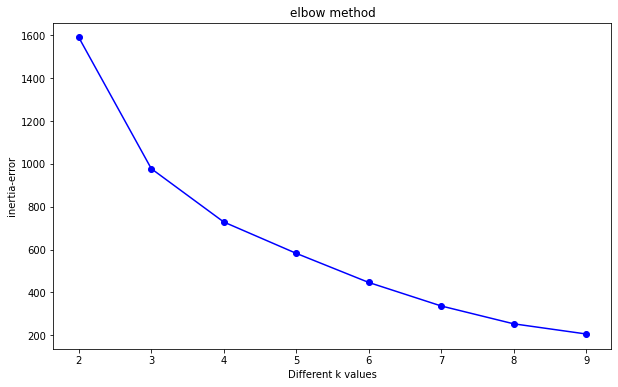

In [128]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [129]:
ssd

[1590.003398447787,
 977.4976761633689,
 728.5337418643694,
 582.2007190339068,
 446.37220674009336,
 336.5644930452941,
 253.22336743083392,
 205.75854692866582]

In [130]:
pd.Series(ssd).diff()

0         NaN
1   -612.5057
2   -248.9639
3   -146.3330
4   -135.8285
5   -109.8077
6    -83.3411
7    -47.4648
dtype: float64

In [131]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,612.5057
3,248.9639
4,146.3330
5,135.8285
6,109.8077
7,83.3411
8,47.4648


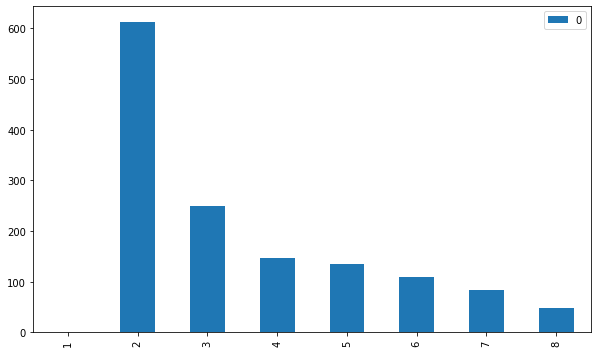

In [132]:
df_diff.plot(kind='bar')

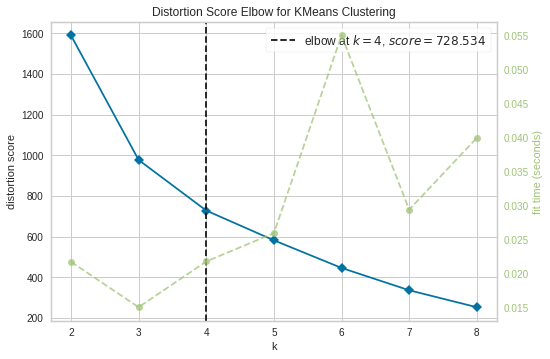

In [133]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(component_df)        # Fit the data to the visualizer
visualizer.show();

In [134]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(component_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8831651090373014
For n_clusters=3, the silhouette score is 0.8429116796720395
For n_clusters=4, the silhouette score is 0.5342804797070222
For n_clusters=5, the silhouette score is 0.5314055783457388
For n_clusters=6, the silhouette score is 0.5499101690059421
For n_clusters=7, the silhouette score is 0.4866612180685509
For n_clusters=8, the silhouette score is 0.4927933351621569


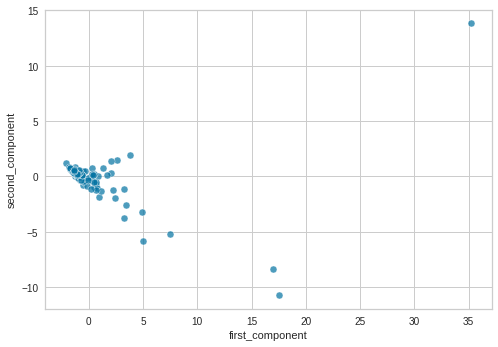

In [135]:
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, alpha=0.7)

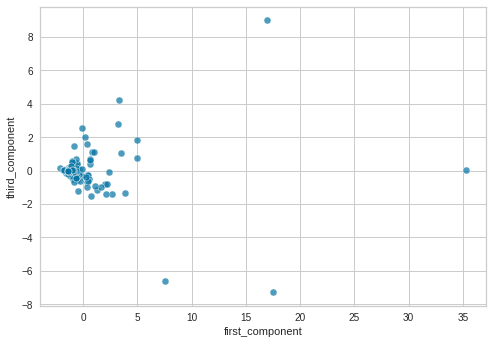

In [ ]:
sns.scatterplot(x = component_df.first_component, y= component_df.third_component, alpha=0.7)

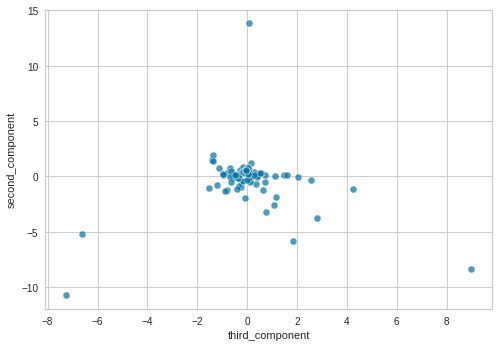

In [ ]:
sns.scatterplot(x = component_df.third_component, y= component_df.second_component, alpha=0.7)

### Model Building and label visualisation

I decided to have 6 clusters. Because USA, Russia, India and China have outlier values in most of the features. Therefore variance affected by these outlier values. According to silhouette method 6 clusters have better score than 4 and 5 clusters. Moreover 6 clusters may give more insight.

In [147]:
model = KMeans(n_clusters =6, random_state=42)
clusters = model.fit_predict(component_df)
clusters

array([5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5,
       0, 5, 5, 5, 4, 0, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 5, 5, 0,
       5, 0, 5, 5, 5, 4, 0, 2, 0, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 5, 5, 5, 5, 5, 5, 5,
       2, 5, 0, 5, 5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 2, 5, 5, 0, 0, 0, 1, 5,
       5, 0, 0, 5, 5, 5], dtype=int32)

In [153]:
model.inertia_

456.4065699032878

In [154]:
model.labels_

array([5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5,
       0, 5, 5, 5, 4, 0, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 0, 5, 5, 0,
       5, 0, 5, 5, 5, 4, 0, 2, 0, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 0, 5, 5, 5, 5, 5, 5, 5,
       2, 5, 0, 5, 5, 5, 5, 5, 0, 0, 5, 5, 0, 5, 2, 5, 5, 0, 0, 0, 1, 5,
       5, 0, 0, 5, 5, 5], dtype=int32)

In [155]:
component_df["cluster"] = model.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



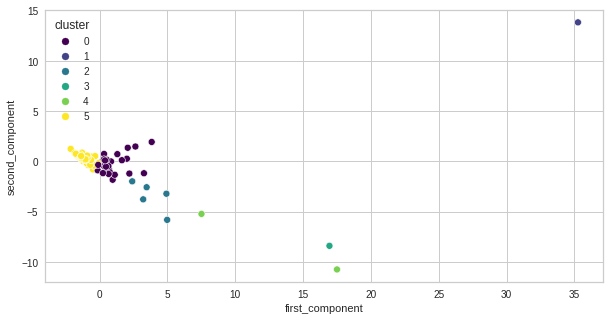

In [156]:
plt.figure(figsize=(10,5))
sns.scatterplot(component_df["first_component"], 
                component_df["second_component"], hue= component_df.cluster,palette= "viridis");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



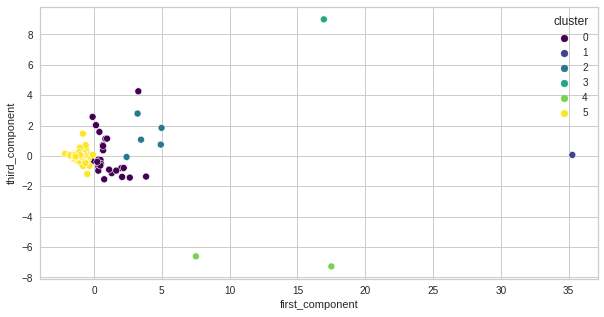

In [157]:
plt.figure(figsize=(10,5))
sns.scatterplot(component_df["first_component"], 
                component_df["third_component"], hue= component_df.cluster,palette= "viridis");

In [159]:
fig = px.scatter_3d(x=component_df["first_component"],
                   y=component_df["second_component"],
                   z=component_df["third_component"],
                   color=component_df.cluster,
                   labels = {"x": "first_component",
                             "y": "second_component",
                             "z": "third_component"},
                   hover_name=component_df["cluster"])

fig.show()

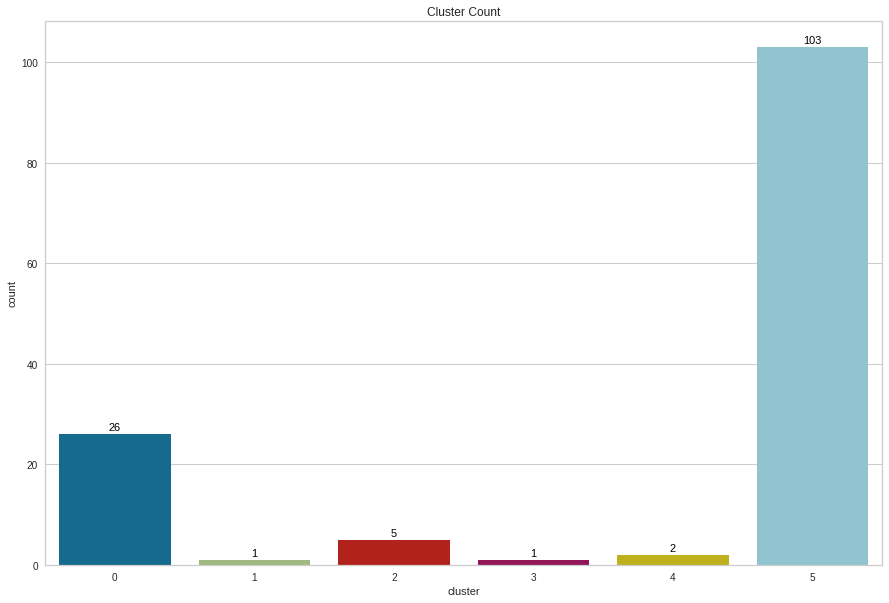

In [163]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = component_df.cluster)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [165]:
component_df.insert(0, "Country", df.Country)

In [171]:
component_df.insert(1, "Military Power Index", df["2020 ranking_Military Strength Power Index"])

In [236]:
component_df[component_df["cluster"] == 0]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster
2,Algeria,0.4659,0.6706,-0.7270,0.3706,0.1274,-0.8007,Moderate
6,Australia,0.3225,0.3252,0.7392,-0.7069,0.3098,-1.2437,Moderate
17,Brazil,0.1988,2.0060,0.2675,-0.8013,1.4471,-0.1384,Moderate
22,Canada,0.3712,0.8400,-0.0056,1.1335,4.2754,-0.3091,Moderate
27,Colombia,0.6045,0.3205,-0.4540,-0.2387,-0.0116,-1.2266,Moderate
40,France,0.1702,2.6366,1.4791,-1.4269,0.0963,-1.9168,Moderate
43,Germany,0.2186,1.3046,0.7224,-1.1333,0.3791,-1.3802,Moderate
45,Greece,0.5311,0.4805,-0.9727,-0.2621,-0.3235,-1.3053,Moderate
50,Indonesia,0.2544,0.7511,-1.0651,-1.5379,0.7064,-0.5556,Moderate
52,Iraq,0.7911,0.1433,-0.0452,2.0253,3.3080,0.5048,Moderate


In [173]:
component_df[component_df["cluster"] == 1]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster
130,United States,0.0606,35.2655,13.8206,0.0672,-0.5120,0.3048,1


In [174]:
component_df[component_df["cluster"] == 2]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster
35,Egypt,0.1872,3.4643,-2.5676,1.0703,-1.2832,-0.9802,2
51,Iran,0.2191,3.2105,-3.7719,2.7919,2.2657,-0.2797,2
87,North Korea,0.3718,4.9771,-5.8104,1.8476,-3.4466,-3.0011,2
110,South Korea,0.1509,4.9223,-3.2112,0.7461,-1.5525,-0.7524,2
124,Turkey,0.2098,2.4013,-1.9802,-0.0695,-0.5952,-1.2440,2


In [176]:
component_df[component_df["cluster"] == 3]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster
101,Russia,0.0681,16.9436,-8.3917,8.9956,-3.3030,1.3513,3


In [177]:
component_df[component_df["cluster"] == 4]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster
26,China,0.0691,17.4995,-10.7396,-7.2797,1.2978,2.2395,4
49,India,0.0953,7.5082,-5.2181,-6.6133,1.7716,2.6917,4


In [178]:
component_df[component_df["cluster"] == 5]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster
0,Afghanistan,1.3444,-1.0839,0.4269,-0.1090,-0.1287,0.0304,5
1,Albania,2.3137,-1.5315,0.4754,-0.0074,-0.3501,0.4003,5
3,Angola,0.8379,-0.5793,0.1669,0.4463,0.3441,-0.2051,5
4,Argentina,0.6521,-0.5483,0.4854,-0.1250,0.1601,-0.4416,5
5,Armenia,2.1251,-1.3612,0.4459,0.0914,-0.3792,0.3834,5
7,Austria,0.9568,-1.2548,0.5645,-0.0909,-0.0173,-0.4096,5
8,Azerbaijan,0.9463,-0.7927,-0.0428,0.3729,0.0039,-0.3095,5
9,Bahrain,1.8547,-1.2619,0.4105,0.0190,-0.2981,0.0801,5
10,Bangladesh,0.7066,-0.4941,-0.7992,-1.1931,0.3010,-0.5002,5
11,Belarus,0.8179,-0.7167,-0.0489,0.4070,-0.3752,-0.2647,5


In [ ]:
mapping = {0:'Moderate', 1:'USA', 2:'Regional Mil.Pwr', 3:'Russia', 4:'China&India', 5:'Others'}
component_df.cluster = [mapping[i] for i in component_df.cluster]

In [201]:
component_df.cluster.value_counts()

Others              103
Moderate             26
Regional Mil.Pwr      5
China&India           2
Russia                1
USA                   1
Name: cluster, dtype: int64

In [202]:
den = pd.DataFrame(component_df,columns=component_df.drop(["Country","cluster", "Military Power Index"],axis=1).columns)
den["cluster"] = component_df["cluster"]

clus_pred = den.groupby("cluster").mean().T
clus_pred

cluster,China&India,Moderate,Others,Regional Mil.Pwr,Russia,USA
first_component,12.5039,1.0593,-1.2013,3.7951,16.9436,35.2655
second_component,-7.9789,-0.2440,0.3322,-3.4683,-8.3917,13.8206
third_component,-6.9465,0.0038,-0.0161,1.2773,8.9956,0.0672
forth_component,1.5347,0.9058,-0.1766,-0.9224,-3.3030,-0.5120
fifth_component,2.4656,-0.7188,0.1782,-1.2515,1.3513,0.3048


In [218]:
fig = px.scatter_3d(x=component_df["cluster"],
                   y=component_df["Country"],
                   z=component_df["Military Power Index"],
                   color=component_df.cluster,
                   labels = {"x": "Clusters",
                             "y": "Countries",
                             "z": "Mil. Pwr Idx."},
                   hover_name=component_df["Country"])

fig.show()

Text(0.5, 1.0, 'Military Power Clusters by K_means with PCA')

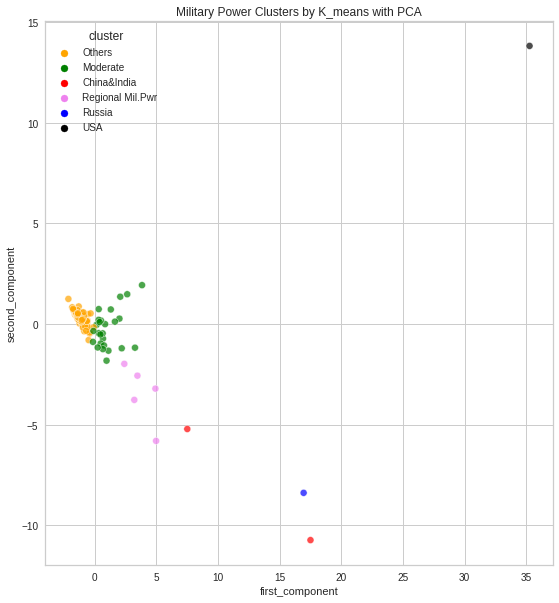

In [217]:
plt.figure(figsize = (20,10))

plt.subplot(122)
sns.scatterplot(x = component_df.first_component, y= component_df.second_component, hue=component_df.cluster, alpha=0.7,
               palette=['orange','green', 'red', 'violet', 'blue', 'black'])
plt.title("Military Power Clusters by K_means with PCA")

### Evaluate 

In [219]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df.head()

,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
0,-0.0882,-0.1047,-0.3554,-0.0081,-0.0025,-0.3452,0.0635,-0.2642,-0.4282,-0.2641,-0.3095,-0.2715,-0.2216,-0.5292,-0.1698,-0.3164,-0.1875,-0.4861,-0.0297,-0.2807,-0.2044,-0.3525,-0.3223,-0.2804,-0.1320,-0.1109
1,0.6466,-0.3010,-0.3554,-0.2735,-0.3286,-0.3452,-0.2606,-0.2642,-0.4282,-0.3745,-0.3095,-0.4907,-0.3252,-0.2588,-0.1698,-0.3164,-0.1875,-0.4861,-0.2049,-0.2771,-0.2367,-0.3429,-0.3052,-0.2765,-0.2841,-0.3047
2,-0.7541,0.1324,0.0934,-0.0399,0.3127,0.0174,0.1986,0.1998,0.1546,0.9044,0.1573,-0.1918,0.3296,0.9012,-0.1698,0.1617,-0.1875,0.3546,-0.0148,-0.2789,-0.1101,0.4337,-0.1745,0.0060,-0.0558,-0.0700
3,-0.4721,-0.0761,-0.0417,-0.0824,-0.0025,-0.1493,-0.0541,-0.1095,-0.1772,-0.3507,-0.2686,-0.0461,-0.0869,-0.1236,-0.1698,-0.3164,-0.1875,-0.4861,-0.1043,-0.2594,-0.0944,0.6504,-0.2868,-0.0862,-0.2280,-0.1387
4,-0.6130,-0.1315,-0.2508,-0.1992,-0.2308,-0.0785,-0.1043,-0.2642,-0.1832,-0.3240,-0.1884,-0.2765,-0.2713,-0.1805,-0.1698,-0.1571,0.2510,-0.4861,-0.1460,-0.1655,0.7016,-0.0639,-0.0079,-0.2291,-0.0625,-0.0516


In [ ]:
combined_df = pd.concat([component_df, scaled_df], axis =1)

In [225]:
combined_df.drop(columns="Military Power Index", axis=1, inplace=True)

In [227]:
combined_df.head()

,Country,first_component,second_component,third_component,forth_component,fifth_component,cluster,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
0,Afghanistan,-1.0839,0.4269,-0.1090,-0.1287,0.0304,Others,-0.0882,-0.1047,-0.3554,-0.0081,-0.0025,-0.3452,0.0635,-0.2642,-0.4282,-0.2641,-0.3095,-0.2715,-0.2216,-0.5292,-0.1698,-0.3164,-0.1875,-0.4861,-0.0297,-0.2807,-0.2044,-0.3525,-0.3223,-0.2804,-0.1320,-0.1109
1,Albania,-1.5315,0.4754,-0.0074,-0.3501,0.4003,Others,0.6466,-0.3010,-0.3554,-0.2735,-0.3286,-0.3452,-0.2606,-0.2642,-0.4282,-0.3745,-0.3095,-0.4907,-0.3252,-0.2588,-0.1698,-0.3164,-0.1875,-0.4861,-0.2049,-0.2771,-0.2367,-0.3429,-0.3052,-0.2765,-0.2841,-0.3047
2,Algeria,0.6706,-0.7270,0.3706,0.1274,-0.8007,Moderate,-0.7541,0.1324,0.0934,-0.0399,0.3127,0.0174,0.1986,0.1998,0.1546,0.9044,0.1573,-0.1918,0.3296,0.9012,-0.1698,0.1617,-0.1875,0.3546,-0.0148,-0.2789,-0.1101,0.4337,-0.1745,0.0060,-0.0558,-0.0700
3,Angola,-0.5793,0.1669,0.4463,0.3441,-0.2051,Others,-0.4721,-0.0761,-0.0417,-0.0824,-0.0025,-0.1493,-0.0541,-0.1095,-0.1772,-0.3507,-0.2686,-0.0461,-0.0869,-0.1236,-0.1698,-0.3164,-0.1875,-0.4861,-0.1043,-0.2594,-0.0944,0.6504,-0.2868,-0.0862,-0.2280,-0.1387
4,Argentina,-0.5483,0.4854,-0.1250,0.1601,-0.4416,Others,-0.6130,-0.1315,-0.2508,-0.1992,-0.2308,-0.0785,-0.1043,-0.2642,-0.1832,-0.3240,-0.1884,-0.2765,-0.2713,-0.1805,-0.1698,-0.1571,0.2510,-0.4861,-0.1460,-0.1655,0.7016,-0.0639,-0.0079,-0.2291,-0.0625,-0.0516


In [231]:
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,third_component,forth_component,fifth_component,2020 ranking_Military Strength Power Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value
first_component,1.0000,0.0000,0.0000,0.0000,0.0000,-0.3444,0.9597,0.9818,0.9179,0.9477,0.9010,0.9267,0.9450,0.7399,0.9351,0.6764,0.7075,0.6962,0.6900,0.8184,0.8169,0.8871,0.4602,0.8943,0.7132,0.7771,0.6932,0.9286,0.1916,0.5424,0.5501
second_component,0.0000,1.0000,-0.0000,-0.0000,0.0000,0.2277,0.2630,-0.0114,-0.1028,0.2147,0.3636,0.3514,0.1904,-0.4149,-0.1947,-0.5417,-0.5000,-0.5489,-0.4736,0.5300,-0.3487,0.3060,-0.5878,0.3896,0.5237,0.5318,-0.0763,0.1134,-0.1285,-0.4712,-0.4440
third_component,0.0000,-0.0000,1.0000,-0.0000,0.0000,0.0318,0.0102,-0.0684,0.1933,0.0292,0.0022,0.0230,0.1484,0.3383,0.0526,0.2818,0.0465,0.2961,-0.0102,-0.0829,0.0371,-0.1519,-0.4018,-0.1254,-0.1344,0.0088,0.4689,-0.2340,0.4668,-0.6056,-0.6050
forth_component,0.0000,-0.0000,-0.0000,1.0000,-0.0000,-0.3267,-0.0372,-0.0376,-0.1195,-0.0018,-0.0003,-0.0435,-0.1183,-0.2520,0.0002,-0.1908,-0.0323,-0.2076,-0.1066,-0.0376,-0.1661,-0.0439,0.1402,0.0504,0.0358,0.0470,0.4333,0.1719,0.8002,0.1827,0.1844
fifth_component,0.0000,0.0000,0.0000,-0.0000,1.0000,0.7773,-0.0004,0.0129,0.1210,0.0543,-0.0728,-0.0134,0.0334,-0.0398,-0.0015,0.0580,0.0874,0.0265,-0.2197,-0.0464,-0.0957,0.0485,-0.1957,0.0473,-0.1980,-0.0063,0.1640,0.0830,0.1308,0.2324,0.2318


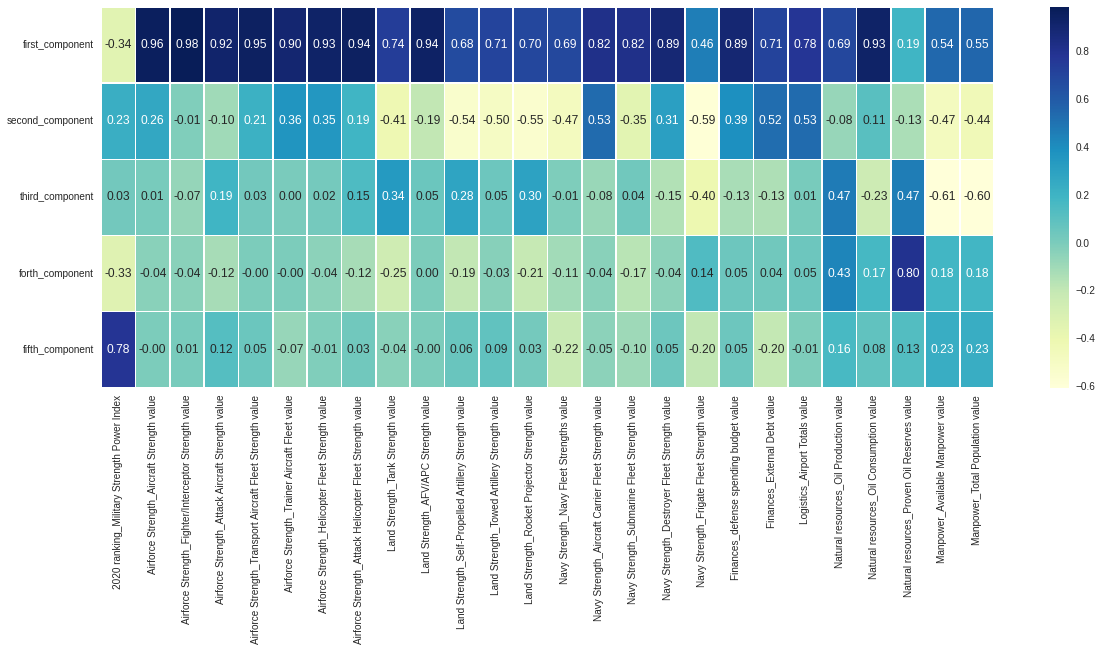

In [233]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:5,5:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

According to k-means algoritm with the principal component analysis outlier values (USA, Russia, China and India) are clustered in 3 different groups. The most interesting insight is the cluster 2 which is composed of 5 countries (North Korea, South Korea, Egypth, Iran and Turkey) and having relatively higher military index scores. The other cluster is composed of 26 counties which has moderate military power in general. The rest of the countries are clustered in the one cluster. 
I used PCA method in this model. I can say that first_component is positively and strongly correlated with the military strength power. 

## Hierarchical Clustering

In [285]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [286]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

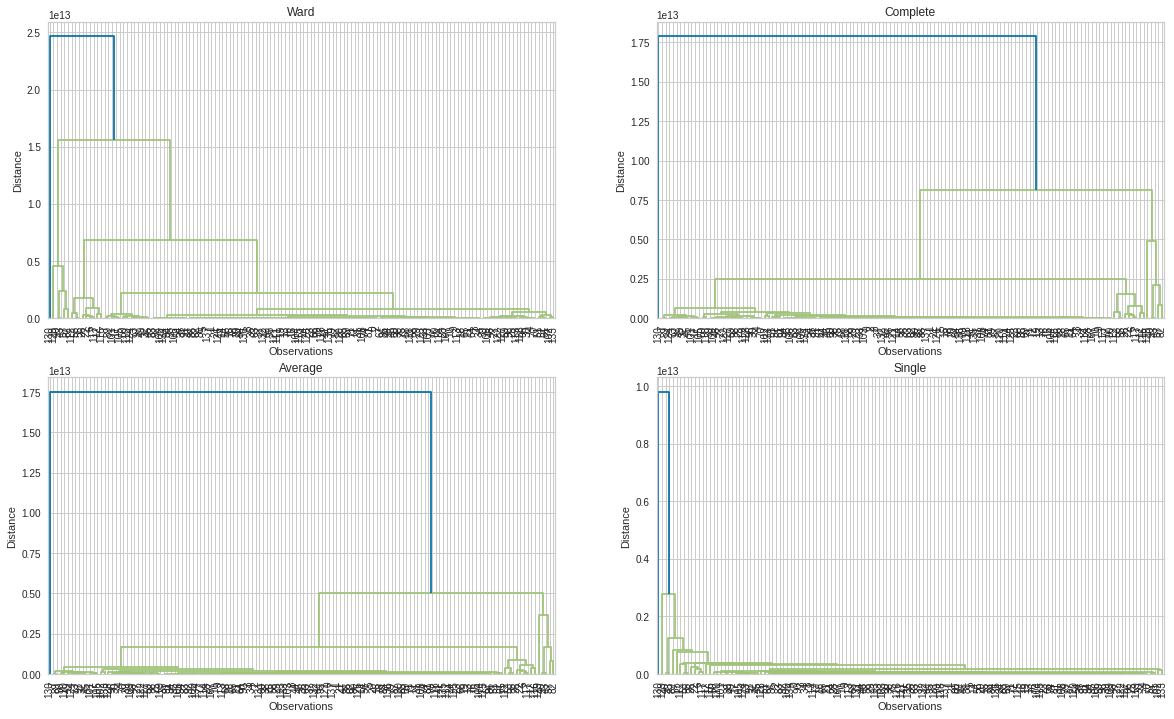

In [287]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [321]:
from sklearn.cluster import AgglomerativeClustering

In [322]:
model1 = AgglomerativeClustering(n_clusters=6, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0,
       0, 0, 0, 0, 0, 0])

In [323]:
component_df["hier_cluster"] = model1.labels_

In [324]:
component_df.sample()

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster,hier_cluster
3,Angola,0.8379,-0.5793,0.1669,0.4463,0.3441,-0.2051,Others,0


In [325]:
fig = px.scatter_3d(x=component_df["Military Power Index"],
                   y=component_df["first_component"],
                   z=component_df["second_component"],
                   color=component_df.hier_cluster,
                   labels = {"x": "Military Power Index",
                             "y": "first_component",
                             "z": "second_component"},
                   hover_name=component_df["Country"])

fig.show()

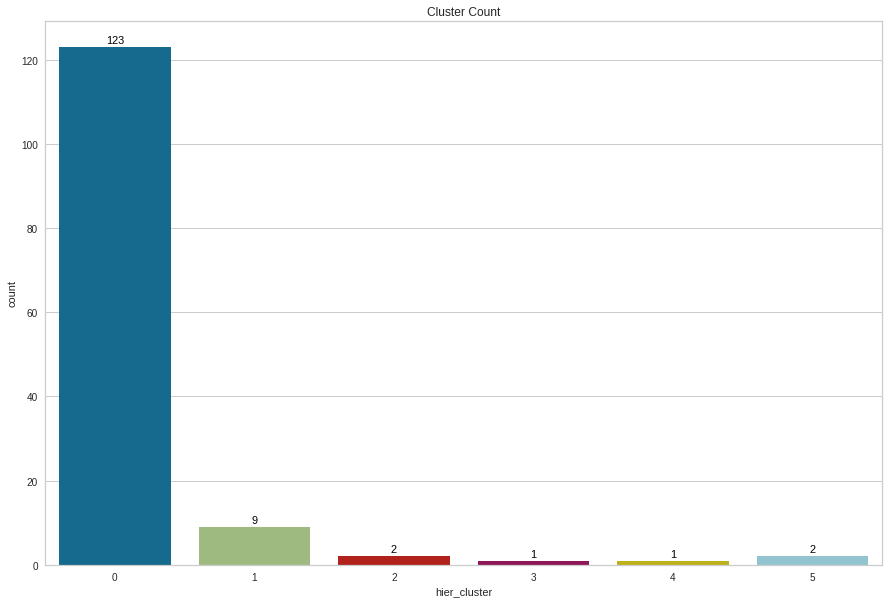

In [311]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = component_df.hier_cluster)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [313]:
component_df[component_df["hier_cluster"] == 0]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster,hier_cluster
0,Afghanistan,1.3444,-1.0839,0.4269,-0.1090,-0.1287,0.0304,Others,0
1,Albania,2.3137,-1.5315,0.4754,-0.0074,-0.3501,0.4003,Others,0
2,Algeria,0.4659,0.6706,-0.7270,0.3706,0.1274,-0.8007,Moderate,0
3,Angola,0.8379,-0.5793,0.1669,0.4463,0.3441,-0.2051,Others,0
4,Argentina,0.6521,-0.5483,0.4854,-0.1250,0.1601,-0.4416,Others,0
5,Armenia,2.1251,-1.3612,0.4459,0.0914,-0.3792,0.3834,Others,0
7,Austria,0.9568,-1.2548,0.5645,-0.0909,-0.0173,-0.4096,Others,0
8,Azerbaijan,0.9463,-0.7927,-0.0428,0.3729,0.0039,-0.3095,Others,0
9,Bahrain,1.8547,-1.2619,0.4105,0.0190,-0.2981,0.0801,Others,0
10,Bangladesh,0.7066,-0.4941,-0.7992,-1.1931,0.3010,-0.5002,Others,0


In [314]:
component_df[component_df["hier_cluster"] == 1]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster,hier_cluster
6,Australia,0.3225,0.3252,0.7392,-0.7069,0.3098,-1.2437,Moderate,1
12,Belgium,1.0499,-1.0250,0.5735,-0.3006,0.0490,-0.5058,Others,1
22,Canada,0.3712,0.8400,-0.0056,1.1335,4.2754,-0.3091,Moderate,1
26,China,0.0691,17.4995,-10.7396,-7.2797,1.2978,2.2395,China&India,1
53,Ireland,1.9481,-1.2974,0.8733,-0.1725,-0.2006,-0.0407,Others,1
55,Italy,0.2111,1.6386,0.1177,-0.9661,0.0443,-1.6123,Moderate,1
112,Spain,0.3388,0.3172,0.2059,-0.9696,0.2951,-1.3130,Moderate,1
116,Sweden,0.5304,-0.8462,0.4260,-0.1071,-0.0400,-0.8460,Others,1
117,Switzerland,0.5259,-0.9168,0.5793,-0.0579,0.0018,-0.7770,Others,1


In [315]:
component_df[component_df["hier_cluster"] == 2]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster,hier_cluster
57,Japan,0.1501,3.8368,1.9317,-1.3590,-0.3765,-0.9729,Moderate,2
82,Netherlands,0.5919,-0.3335,0.5272,-0.6472,0.1786,-1.2612,Others,2


In [316]:
component_df[component_df["hier_cluster"] == 3]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster,hier_cluster
130,United States,0.0606,35.2655,13.8206,0.0672,-0.5120,0.3048,USA,3


In [317]:
component_df[component_df["hier_cluster"] == 4]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster,hier_cluster
129,United Kingdom,0.1717,2.0708,1.3557,-1.3837,0.6372,-2.0468,Moderate,4


In [318]:
component_df[component_df["hier_cluster"] == 5]

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster,hier_cluster
40,France,0.1702,2.6366,1.4791,-1.4269,0.0963,-1.9168,Moderate,5
43,Germany,0.2186,1.3046,0.7224,-1.1333,0.3791,-1.3802,Moderate,5


### Evaluate 

In [320]:
component_df.sample()

,Country,Military Power Index,first_component,second_component,third_component,forth_component,fifth_component,cluster,hier_cluster
69,Madagascar,3.0869,-1.5961,0.5478,-0.1019,-0.4674,0.9752,Others,0


I got different clusters in Hierarchical Clustering than k-means. I used PCA also in Hierarchical Clustering. USA clustered same as the k-means but the other outlier countries clustered different than k-means. When I compare the results of these models, clusters from k-means looks better.   